In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

Reading Dataset and EDA

In [2]:
startups_norm=pd.read_csv("50_Startups.csv")

In [3]:
startups_norm.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [4]:
startups_norm.shape

(50, 5)

In [5]:
startups_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups_norm.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
startups_norm.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startups_norm.duplicated().sum()

0

In [9]:
startups_norm.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


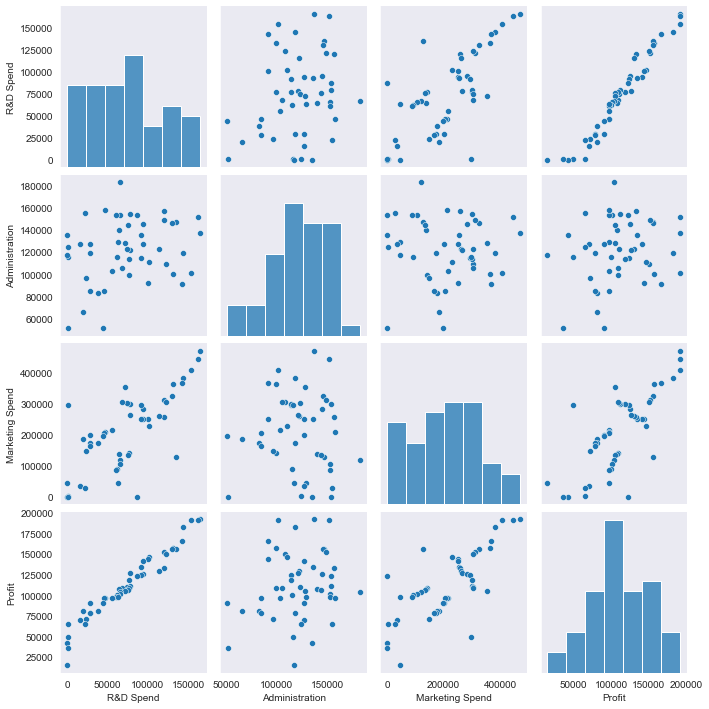

In [10]:
sns.set_style(style="dark")
sns.pairplot(startups_norm)

In [11]:
startups_norm.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [12]:
startups_norm=startups_norm.rename({"R&D Spend":"R_Spend","Marketing Spend":"M_Spend"}, axis=1)

In [13]:
startups_norm.head(2)

,R_Spend,Administration,M_Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


Checking for ouliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2983505f100>,
 'caps': [<matplotlib.lines.Line2D at 0x2983505f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2983504ec70>],
 'medians': [<matplotlib.lines.Line2D at 0x2983505fe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x2983506b250>],
 'means': []}

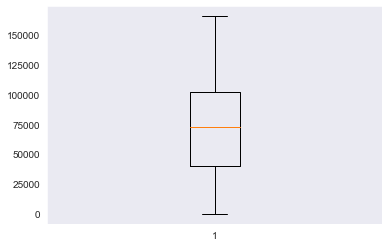

In [14]:
plt.boxplot(startups_norm["R_Spend"])

{'whiskers': [<matplotlib.lines.Line2D at 0x298350c1af0>,
 'caps': [<matplotlib.lines.Line2D at 0x298350ce250>,
 'boxes': [<matplotlib.lines.Line2D at 0x298350c1760>],
 'medians': [<matplotlib.lines.Line2D at 0x298350ce970>],
 'fliers': [<matplotlib.lines.Line2D at 0x298350ced00>],
 'means': []}

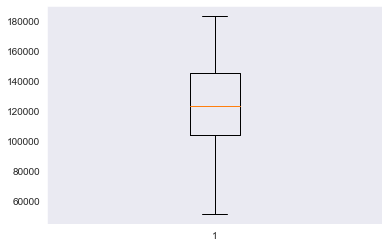

In [15]:
plt.boxplot(startups_norm["Administration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2983512d4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2983512dbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2983512d130>],
 'medians': [<matplotlib.lines.Line2D at 0x298351373a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29835137730>],
 'means': []}

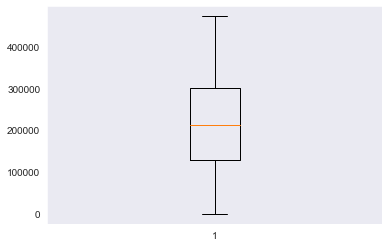

In [16]:
plt.boxplot(startups_norm["M_Spend"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29835190610>,
 'caps': [<matplotlib.lines.Line2D at 0x29835190d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x29835190280>],
 'medians': [<matplotlib.lines.Line2D at 0x29835198490>],
 'fliers': [<matplotlib.lines.Line2D at 0x29835198760>],
 'means': []}

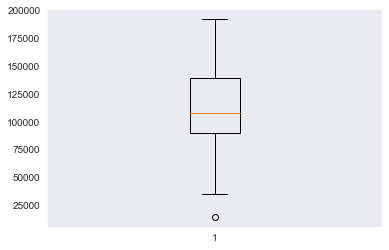

In [17]:
plt.boxplot(startups_norm["Profit"])

In [18]:
median=startups_norm.loc[startups_norm["Profit"]>25000].median()

<ipython-input-18-02558b976ced>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=startups_norm.loc[startups_norm["Profit"]>25000].median()


In [19]:
median

R_Spend            73994.56
Administration    122782.75
M_Spend           214634.81
Profit            108552.04
dtype: float64

In [20]:
startups_norm.median()

<ipython-input-20-e682158dab21>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  startups_norm.median()


R_Spend            73051.080
Administration    122699.795
M_Spend           212716.240
Profit            107978.190
dtype: float64

In [21]:
startups_norm["Profit"]=startups_norm["Profit"].mask(startups_norm["Profit"]<25000, median['Profit'])

In [22]:
startups_norm.median()

<ipython-input-22-e682158dab21>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  startups_norm.median()


R_Spend            73051.080
Administration    122699.795
M_Spend           212716.240
Profit            108552.040
dtype: float64

In [23]:
startups_norm.describe()

,R_Spend,Administration,M_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,113890.052000
std,45902.256482,28017.802755,122290.310726,37787.588984
min,0.000000,51283.140000,0.000000,35673.410000
25%,39936.370000,103730.875000,129300.132500,92151.020000
50%,73051.080000,122699.795000,212716.240000,108552.040000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [24]:
startups_norm.corr()

,R_Spend,Administration,M_Spend,Profit
R_Spend,1.000000,0.241955,0.724248,0.956323
Administration,0.241955,1.000000,-0.032154,0.206204
M_Spend,0.724248,-0.032154,1.000000,0.728849
Profit,0.956323,0.206204,0.728849,1.000000


In [25]:
startups_norm.head(3)

,R_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


# Normal model without any Tranormation

In [26]:
norm_model=smf.ols("Profit~R_Spend+Administration+M_Spend+State", startups_norm).fit()

In [27]:
norm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.54e-23
Time:                        12:55:35   Log-Likelihood:                -534.06
No. Observations:                  50   AIC:                             1080.
Df Residuals:                      44   BIC:                             1092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.832e+04   8190.081      7.120      0.000    4.18e+04    7.48e+04
State[T.Florida]  -4239.5088   4010.101     -1.057      0.296   -1.23e+04    3842.318
State[T.New York] -4855.5808   3873.336     -1.254      0.217   -1.27e+04    2950.616
R_Spend               0.7495      0.055     13.578      0.000       0.638       0.861
Administration       -0.0145      0.062     -0.233      0.817      -0.140       0.111
M_Spend               0.0241      0.020      1.180      0.244      -0.017       0.065
==============================================================================
Omnibus:                       43.120   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.069
Skew:                           2.160   Prob(JB):                     1.96e-42
Kurtosis:                      11.575   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
norm_model.params

Intercept            58316.845755
State[T.Florida]     -4239.508779
State[T.New York]    -4855.580838
R_Spend                  0.749547
Administration          -0.014463
M_Spend                  0.024063
dtype: float64

In [29]:
startups_dummy=pd.get_dummies(startups_norm["State"])

In [30]:
startups_dummy.head(2)

,California,Florida,New York
0,0,0,1
1,1,0,0


In [31]:
startups_norm[["California", "Florida","New York"]]=startups_dummy

In [32]:
startups_norm.head()

,R_Spend,Administration,M_Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [33]:
startups2=startups_norm.drop(["State"], axis=1)

In [34]:
startups2.head()

,R_Spend,Administration,M_Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [35]:
startups2.corr()

,R_Spend,Administration,M_Spend,Profit,California,Florida,New York
R_Spend,1.000000,0.241955,0.724248,0.956323,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.206204,-0.015478,0.010493,0.005145
M_Spend,0.724248,-0.032154,1.000000,0.728849,-0.168875,0.205685,-0.033670
Profit,0.956323,0.206204,0.728849,1.000000,-0.085633,0.089564,-0.002563
California,-0.143165,-0.015478,-0.168875,-0.085633,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.089564,-0.492366,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,-0.002563,-0.515152,-0.492366,1.000000


In [36]:
startups2=startups2.rename({"New York":"Newyork"}, axis=1)

In [37]:
startups2.head()

,R_Spend,Administration,M_Spend,Profit,California,Florida,Newyork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Normal Model with DUmmy Variable for state

In [38]:
norm_model1_dummy=smf.ols("Profit~R_Spend+Administration+M_Spend+California+Florida+Newyork",startups2).fit()

In [39]:
norm_model1_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           4.54e-23
Time:                        12:55:37   Log-Likelihood:                -534.06
No. Observations:                  50   AIC:                             1080.
Df Residuals:                      44   BIC:                             1092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.146e+04   6035.523      6.870      0.000    2.93e+04    5.36e+04
R_Spend            0.7495      0.055     13.578      0.000       0.638       0.861
Administration    -0.0145      0.062     -0.233      0.817      -0.140       0.111
M_Spend            0.0241      0.020      1.180      0.244      -0.017       0.065
California      1.685e+04   2914.243      5.783      0.000     1.1e+04    2.27e+04
Florida         1.261e+04   3243.643      3.889      0.000    6076.342    1.92e+04
Newyork           1.2e+04   2957.743      4.056      0.000    6036.465     1.8e+04
==============================================================================
Omnibus:                       43.120   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.069
Skew:                           2.160   Prob(JB):                     1.96e-42
Kurtosis:                      11.575   Cond. No.                     4.47e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Calculating VIF

In [40]:
startups2.head(2)

,R_Spend,Administration,M_Spend,Profit,California,Florida,Newyork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [41]:
#VIF Calculation for all variable
rsq_R_spend=smf.ols("R_Spend~Administration+M_Spend+California+Florida+Newyork",startups2).fit().rsquared
vif_R_spend=1/(1-rsq_R_spend)

#VIF for administration
rsq_Administration=smf.ols("Administration~R_Spend+M_Spend+California+Florida+Newyork",startups2).fit().rsquared
vif_administration=1/(1-rsq_Administration)

#vif for M_Spend
rsq_M_Spend=smf.ols("M_Spend~R_Spend+Administration+California+Florida+Newyork", startups2).fit().rsquared
vif_M_Spend=1/(1-rsq_M_Spend)

#vif for California
rsq_california=smf.ols("California~R_Spend+M_Spend+Administration+Florida+Newyork", startups2).fit().rsquared
vif_california=1/(1-rsq_california)

# vif for Florida
rsq_florida=smf.ols("Florida~R_Spend+Administration+California+M_Spend+Newyork", startups2).fit().rsquared
vif_florida=1/(1-rsq_florida)

#vif for newyork
rsq_newyork=smf.ols("Newyork~R_Spend+Administration+California+Florida+M_Spend", startups2).fit().rsquared
vif_NY=1/(1-rsq_newyork)



<ipython-input-41-d8884406f034>:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif_california=1/(1-rsq_california)
<ipython-input-41-d8884406f034>:19: RuntimeWarning: divide by zero encountered in double_scalars
  vif_florida=1/(1-rsq_florida)
<ipython-input-41-d8884406f034>:23: RuntimeWarning: divide by zero encountered in double_scalars
  vif_NY=1/(1-rsq_newyork)


In [42]:
d1={"Variable":["R_Spend","Administration","M_Spend","California","Florida","Newyork"],"VIF":[vif_R_spend,vif_administration,vif_M_Spend,vif_california,vif_florida,vif_NY]}

In [43]:
vif=pd.DataFrame(d1)
vif

,Variable,VIF
0,R_Spend,2.495511
1,Administration,1.177766
2,M_Spend,2.416797
3,California,inf
4,Florida,inf
5,Newyork,inf


State has Infinite VIF hence dropping the State columns. other variables VIF is less than 20 so Considering them

In [44]:
startups2.head(3)

,R_Spend,Administration,M_Spend,Profit,California,Florida,Newyork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0


In [45]:
startups3=startups2.iloc[:,:4]

In [46]:
startups3.head(3)

,R_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


## Residual Analysis

Text(0.5, 1.0, 'Normal QQ plot of Reisdual')

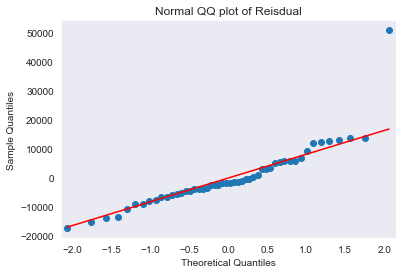

In [47]:
import statsmodels.api as sm
qqplot=sm.qqplot(norm_model.resid, line="q")
plt.title("Normal QQ plot of Reisdual")

Text(0.5, 1.0, 'Normal QQ plot of Residual')

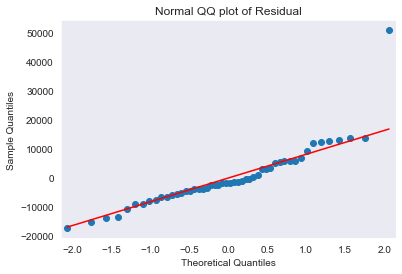

In [48]:
qqplot1=sm.qqplot(norm_model1_dummy.resid, line="q")
plt.title("Normal QQ plot of Residual")

In [49]:
##in both model we can see outlier
list(np.where(norm_model.resid>30000))

[array([49], dtype=int64)]

Residual plot for Homoscedasticity

In [50]:
def standardised_values(vals):
    return (vals-vals.mean())/vals.std()

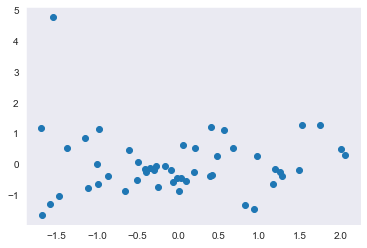

In [51]:
plt.scatter(standardised_values(norm_model.fittedvalues),standardised_values(norm_model.resid))

eval_env: 1


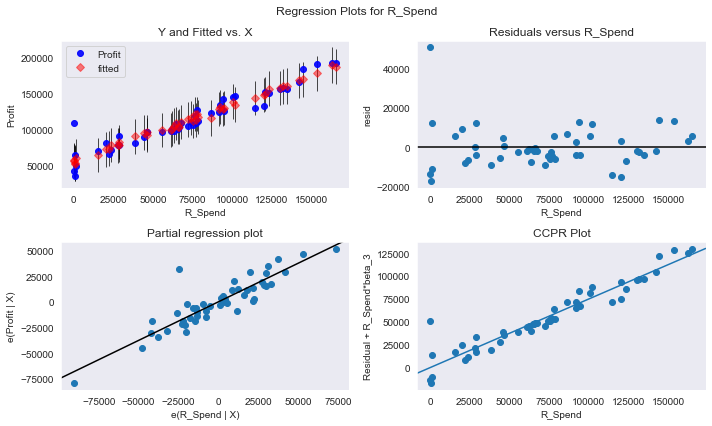

In [52]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model,"R_Spend", fig=fig)
plt.show()

eval_env: 1


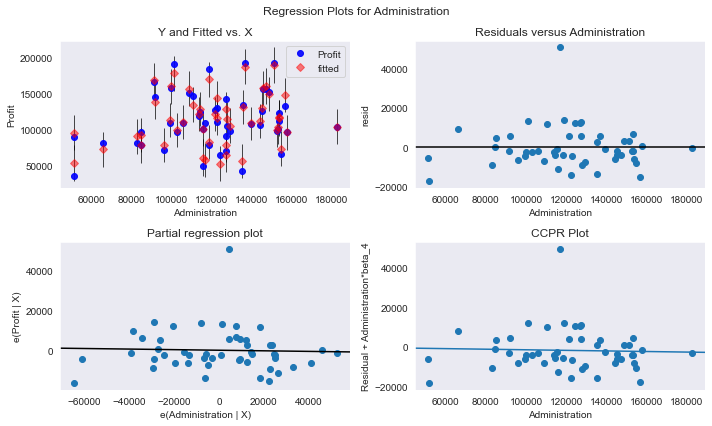

In [53]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model,"Administration", fig=fig)
plt.show()

eval_env: 1


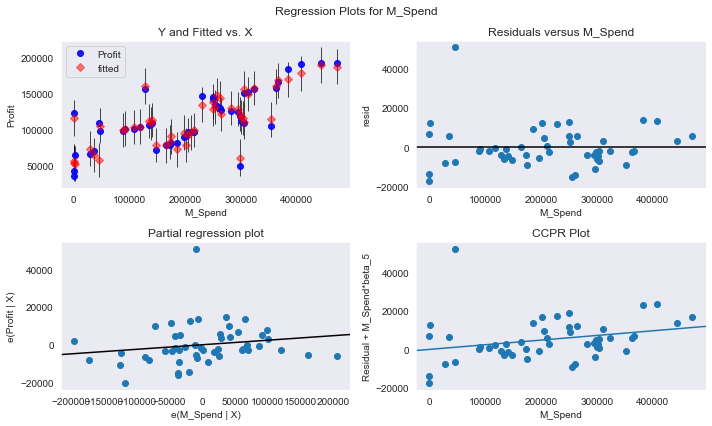

In [54]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model,"M_Spend", fig=fig)
plt.show()

### Cook's Distance

In [55]:
model_influence=norm_model.get_influence()
(c,_)=model_influence.cooks_distance

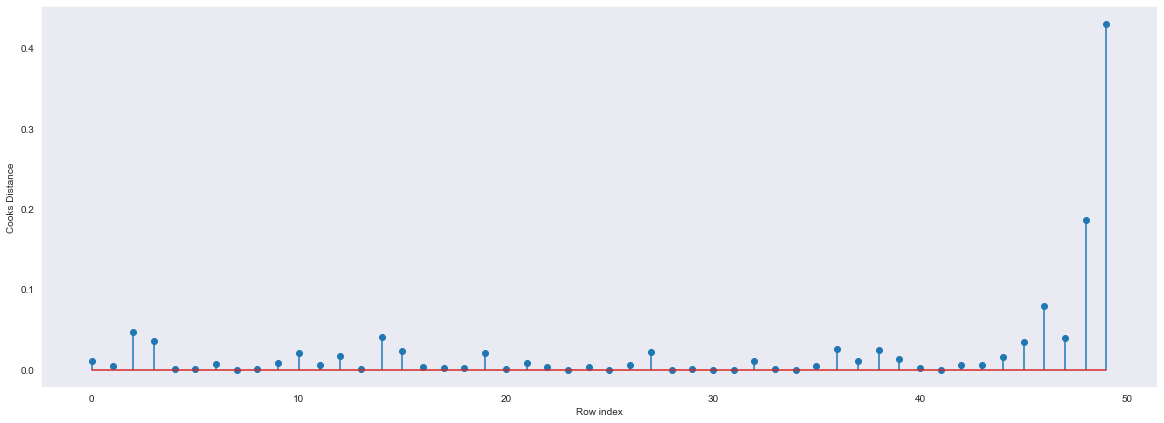

In [56]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

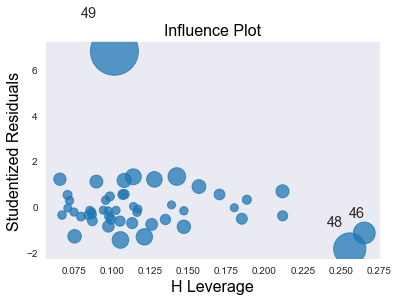

In [57]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(norm_model)
plt.show()

In [58]:
k = startups3.shape[1]
n = startups3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

#### As per cook's distance there isn't any outlier in dataset but as per QQ plot data point 49 is Influencing the dataset hence removing it and trying a model without datapoint 49


In [59]:
startups4=startups3.drop(startups3.index[49], axis=0)

In [60]:
startups4.head(2)

,R_Spend,Administration,M_Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [61]:
startups4.shape

(49, 4)

In [62]:
N_model=smf.ols("Profit~R_Spend+Administration+M_Spend+Profit",startups4).fit()

In [63]:
N_model.pvalues

Intercept         0.690459
R_Spend           0.478211
Administration    0.044392
M_Spend           0.150200
Profit            0.000000
dtype: float64

In [64]:
norm_model.pvalues

Intercept            7.616888e-09
State[T.Florida]     2.961869e-01
State[T.New York]    2.166108e-01
R_Spend              2.447818e-17
Administration       8.170217e-01
M_Spend              2.443359e-01
dtype: float64

In [65]:
norm_model.rsquared, norm_model.rsquared_adj

(0.9207096271490335, 0.9116993575068782)

In [66]:
N_model.rsquared, N_model.rsquared_adj

(1.0, 1.0)

In [67]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~R_Spend+Administration+M_Spend+Profit",data=startups4).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startups4=startups4.drop(startups4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startups4
else:
    final_model=smf.ols("Profit~R_Spend+Administration+M_Spend+Profit",data=startups4).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 1.0


# Model with Logarithmic tranformation

{'whiskers': [<matplotlib.lines.Line2D at 0x29836ba9760>,
 'caps': [<matplotlib.lines.Line2D at 0x29836ba9e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x29836ba93d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29836bb35e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29836bb3970>],
 'means': []}

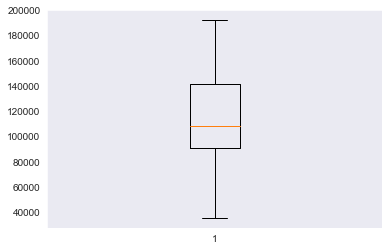

In [68]:
plt.boxplot(startups4["Profit"])

In [69]:
startups4.head(3)

,R_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_Spend', ylabel='Density'>

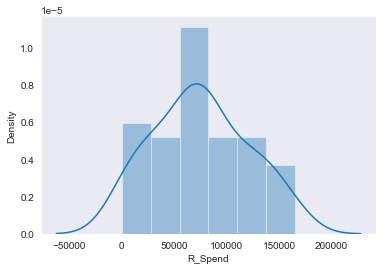

In [70]:
sns.distplot(startups4["R_Spend"])

In [71]:
startups5=pd.DataFrame()

In [72]:
startups5["R_Spend"]=np.log(startups4["R_Spend"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
startups5.head(5
)

,R_Spend
0,12.015815
1,11.999034
2,11.941075
3,11.880151
4,11.864338


In [74]:
startups5["Admin"]=np.log(startups4["Administration"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admin', ylabel='Density'>

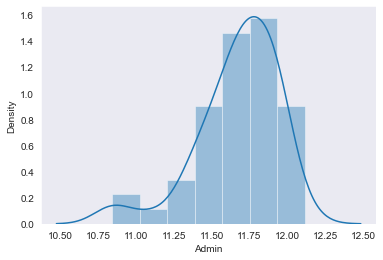

In [75]:
sns.distplot(startups5["Admin"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

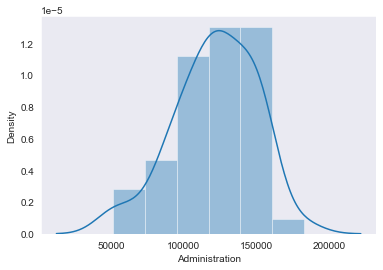

In [76]:
sns.distplot(startups4["Administration"])

In [77]:
startups4.head()

,R_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Can not go for Logarithmic tranformation as dataset has some 0 values and during log tranformation 0 values becomes infinite

In [78]:
startups4.shape

(49, 4)

# Going for Min max scaler Tranforamtion


In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
startups4.head(2)

,R_Spend,Administration,M_Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [81]:
num_vars=["R_Spend","Administration","M_Spend", "Profit"]

In [82]:
startups_minmax=pd.DataFrame(num_vars)

In [83]:
startups_minmax=scaler.fit_transform(startups4)

In [84]:
startups_minmax=pd.DataFrame(startups_minmax,columns=num_vars)

In [85]:
startups_minmax.head(2)

,R_Spend,Administration,M_Spend,Profit
0,1.000000,0.651744,1.000000,1.000
1,0.983359,0.761972,0.940893,0.997


C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R_Spend', ylabel='Density'>

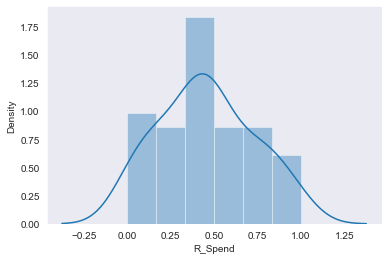

In [86]:
sns.distplot(startups_minmax["R_Spend"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

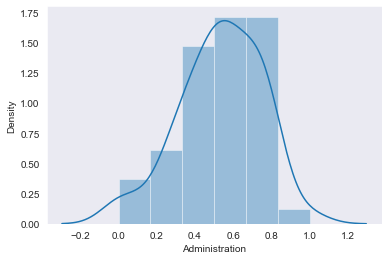

In [87]:
sns.distplot(startups_minmax["Administration"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='M_Spend', ylabel='Density'>

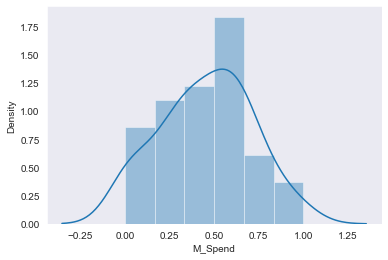

In [88]:
sns.distplot(startups_minmax["M_Spend"])

C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

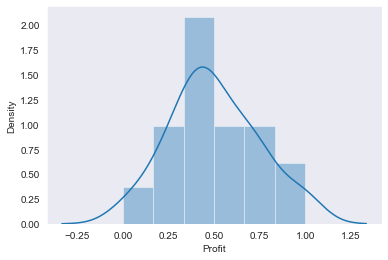

In [89]:
sns.distplot(startups_minmax["Profit"])

In [90]:
minmax_model=smf.ols("Profit~R_Spend+M_Spend+Administration",startups_minmax).fit()

In [91]:
minmax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           8.85e-32
Time:                        12:55:49   Log-Likelihood:                 79.825
No. Observations:                  49   AIC:                            -151.6
Df Residuals:                      45   BIC:                            -144.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0994      0.023      4.237      0.000       0.052       0.147
R_Spend            0.8268      0.040     20.470      0.000       0.745       0.908
M_Spend            0.0760      0.042      1.825      0.075      -0.008       0.160
Administration    -0.0186      0.036     -0.518      0.607      -0.091       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF Calculation

In [92]:
startups4.head(2)

,R_Spend,Administration,M_Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [93]:
rsq_R_Spend=smf.ols("R_Spend~Administration+M_Spend", startups_minmax).fit().rsquared
vif_R_Spend=1/(1-rsq_R_Spend)

rsq_Administration=smf.ols("Administration~R_Spend+M_Spend", startups_minmax).fit().rsquared
vif_administration=1/(1-rsq_Administration)

rsq_M_Spend=smf.ols("M_Spend~Administration+R_Spend", startups_minmax).fit().rsquared
vif_M_Spend=1/(1-rsq_M_Spend)

In [94]:
d1={"Variable":["R_Spend","Administration","M_Spend"],"Vif":[vif_R_spend,vif_administration,vif_M_Spend]}
vif=pd.DataFrame(d1)

In [95]:
vif.head()

,Variable,Vif
0,R_Spend,2.495511
1,Administration,1.175172
2,M_Spend,2.239957


VIF Values for variable are within range However P value of Administration is more than 0.05

Text(0, 0.5, 'Residual values')

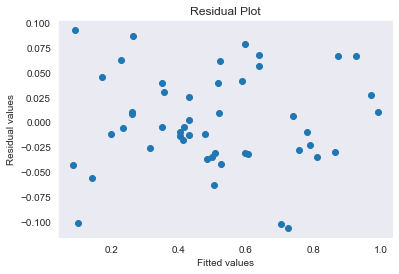

In [96]:
plt.scatter(minmax_model.fittedvalues,minmax_model.resid)
plt.title("Residual Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residual values")

eval_env: 1


<Figure size 1080x576 with 0 Axes>

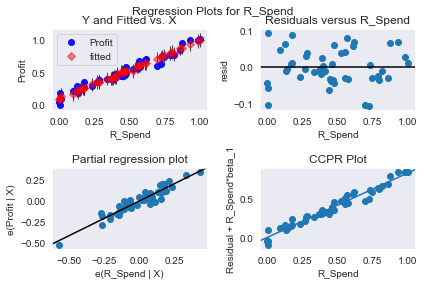

In [97]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(minmax_model,"R_Spend")

eval_env: 1


<Figure size 1080x576 with 0 Axes>

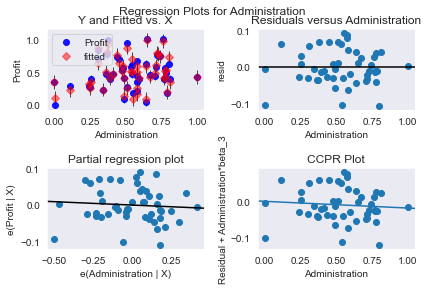

In [98]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(minmax_model,"Administration")
plt.show()

eval_env: 1


<Figure size 1080x576 with 0 Axes>

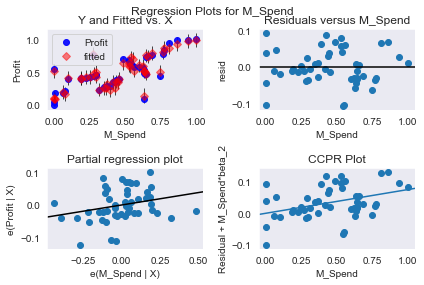

In [99]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(minmax_model,"M_Spend")
plt.show()

In [100]:
model_influence=minmax_model.get_influence()
(c,_)=model_influence.cooks_distance

In [101]:
startups_minmax.head(1)

,R_Spend,Administration,M_Spend,Profit
0,1.0,0.651744,1.0,1.0


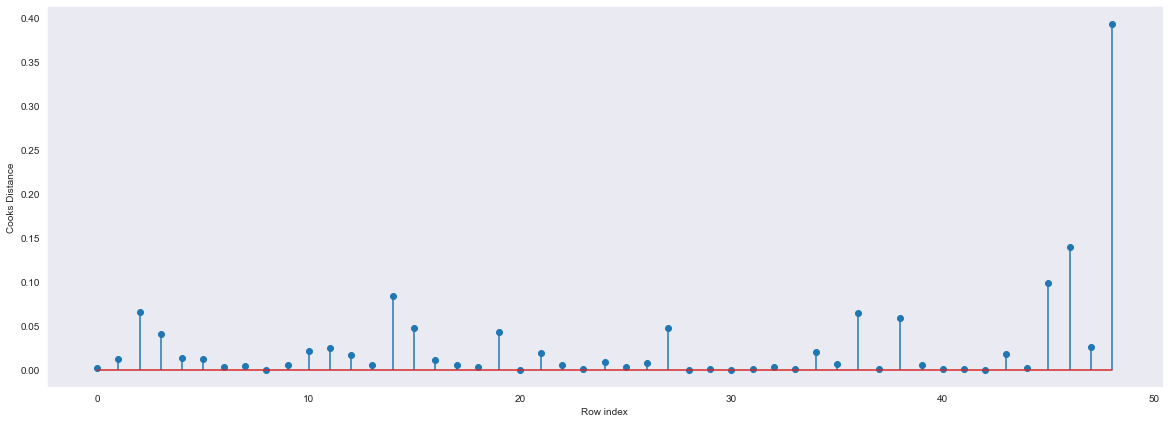

In [102]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups_minmax)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [103]:
(np.argmax(c),np.max(c))

(48, 0.3927442055632138)

Checkin for high influence points

In [104]:
k=startups_minmax.shape[1]
n=startups_minmax.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.30612244897959184

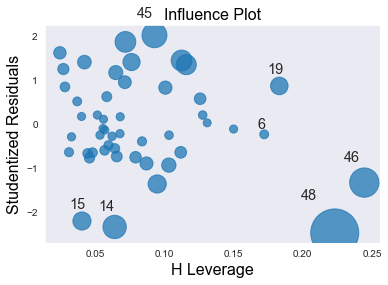

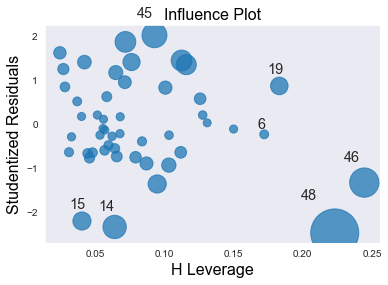

In [105]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(minmax_model)

Text(0.5, 1.0, 'Normal QQ plot of Reisdual')

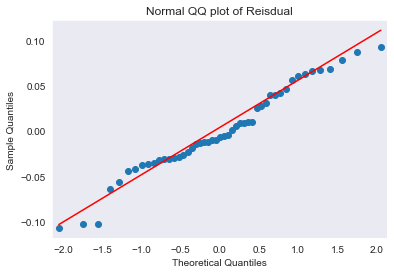

In [106]:
import statsmodels.api as sm
qqplot=sm.qqplot(minmax_model.resid, line="q")
plt.title("Normal QQ plot of Reisdual")

As per above plot it is found that leverage cutoff is 0.3061 and none of the datapoints in plots are above it.

In [107]:
minmax_model.pvalues

Intercept         1.106641e-04
R_Spend           1.971077e-24
M_Spend           7.458443e-02
Administration    6.070728e-01
dtype: float64

but as per model statistics values it is found that Administration variable has P value more than 0.05 hence dropping that variable

In [108]:
N_startups=startups_minmax.drop(["Administration"],axis=1)

In [109]:
N_startups.head(1)

,R_Spend,M_Spend,Profit
0,1.0,1.0,1.0


Building New model with COnsidered variable only

In [110]:
Minmax_new=smf.ols("Profit~R_Spend+M_Spend",N_startups).fit()

In [111]:
Minmax_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           3.74e-33
Time:                        12:55:54   Log-Likelihood:                 79.679
No. Observations:                  49   AIC:                            -153.4
Df Residuals:                      46   BIC:                            -147.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0901      0.015      6.027      0.000       0.060       0.120
R_Spend        0.8188      0.037     22.136      0.000       0.744       0.893
M_Spend        0.0827      0.039      2.104      0.041       0.004       0.162
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         8.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
Minmax_new.pvalues

Intercept    2.641438e-07
R_Spend      3.628510e-26
M_Spend      4.084443e-02
dtype: float64

In [113]:
Minmax_new.rsquared,Minmax_new.rsquared_adj

(0.9610856807456628, 0.9593937538215612)

In [114]:
startups4.head(1)

,R_Spend,Administration,M_Spend,Profit
0,165349.2,136897.8,471784.1,192261.83


Predicting for new Datapoints

In [115]:
scaler1 = MinMaxScaler()

In [116]:
minmaxforinput=scaler1.fit_transform(startups4[["R_Spend","Administration", "M_Spend"]])

In [117]:
print("MAx Expenditure amount this model can take for R&D Spend,Administration,Marketing Spends to predict are:\n",startups4.max())
RDSpend=float(input("Enter R&D Spend of Startup:"))
Administration=float(input("Enter Administration Spend of Startup:"))
MSpend=float(input("Enter Marketing Spend of Startup:"))
Newdata={"R_Spend":[RDSpend],"Administration":[Administration],"M_Spend":[MSpend]}
Newdata1=pd.DataFrame(Newdata)
Newdata1
minmax=scaler1.transform(Newdata1)
minmax1=pd.DataFrame(minmax, columns=["R_Spend","Administration","M_Spend"])
Newdatapoint=Minmax_new.predict(minmax1)
Newdatapoint1=pd.DataFrame(Newdatapoint, columns=["Profit"])
minmax1["Profit"]=Newdatapoint1
results=scaler.inverse_transform(minmax1)
results=pd.DataFrame(results, columns=["R_Spend","Administration","M_Spend","Profit"])
print("Below you can find your entered values and Predicted profit")
print(results)
print("Prediction accuracy is ",np.round(((Minmax_new.rsquared)*100),21), "%")




MAx Expenditure amount this model can take for R&D Spend,Administration,Marketing Spends to predict are:
 R_Spend           165349.20
Administration    182645.56
M_Spend           471784.10
Profit            192261.83
dtype: float64
Below you can find your entered values and Predicted profit
   R_Spend  Administration   M_Spend        Profit
0  45135.0          4621.0  454132.0  97246.105142
Prediction accuracy is  96.10856807456628 %


In [118]:
results

,R_Spend,Administration,M_Spend,Profit
0,45135.0,4621.0,454132.0,97246.105142
